In [1]:
import pandas as pd
#in order to read data where separator is \t means tab
orders = pd.read_csv('http://bit.ly/chiporders', sep = '\t')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
#here the separator is | and headers is not the first row of the table, so pass default indexes
movieusers = pd.read_csv('http://bit.ly/movieusers', sep='|', header = None)
movieusers.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
#When you want to put column names instead of default intexes
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movieusers1 = pd.read_csv('http://bit.ly/movieusers', sep = '|', names = column_names)
movieusers1.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
#here is a classical csv file
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [5]:
ufo.City.head()
#this works as Series too. Instead of ufo['City']! Nice....Although it doesn`t work where a space after the first word comes
#like for example in the column named: Colors Reported...
#Or if that name is a build-in attribute of the DataFrame like ufo.shape

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [31]:
#You can concatenate two Series! Nice!
ufo.City.head() + ', ' + ufo.State.head()

0                  Ithaca, NY
1             Willingboro, NJ
2                 Holyoke, CO
3                 Abilene, KS
4    New York Worlds Fair, NY
dtype: object

In [63]:
#assign a new Series into the DataFrame
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,city,colors_reported,shape_reported,state,time,Location,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY","Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ","Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO","Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS","Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY","New York Worlds Fair, NY"


In [33]:
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time,Location
count,18216,2882,15597,18241,18241,18216
unique,6476,27,27,52,16145,8029
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00,"Seattle, WA"
freq,187,780,2803,2529,27,187


In [36]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [46]:
# if I want to describe only the genre
movies.genre.describe()
# or I can tell it to include the objects of the DataFrame and see description of all non-numerical types
movies.describe(include = ['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [42]:
''' Cool tip: press shift+tab (multiple times to get it bigger) inside the parenthesis of a function to see which 
are the arguments it takes'''
print(movies.shape)
print(movies.dtypes)

(979, 6)
star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [47]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [48]:
#To rename some columns use:
ufo.rename(columns = {'Shape Reported':'Shape_Reported'}, inplace = True)
ufo.columns

Index(['City', 'Colors Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [52]:
# To rename all columns you can do this:
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time', 'location']
ufo.columns = ufo_cols
ufo.head()

,city,colors reported,shape reported,state,time,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [ ]:
# I can pass column names direct when I read the file, but I must explicitly say that header = 0.
#That means that the header has some existing names and I want to change them.
ufo = pd.read_csv('http://bit.ly/uforeports', names = ufo_cols, header = 0)

In [58]:
# When you want to replace all the columns` spaces with underscores and the columns are too many
ufo.columns = ufo.columns.str.replace(' ', '_')

In [59]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time',
       'location'],
      dtype='object')

In [60]:
#There are to way to drop columns. Either this:
ufo.drop(columns = ['location'], inplace = True)
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [65]:
#Or this: (Here you must clarify that this namestring that you are giving is on axis = 1 for columns. Axis = 0 is for rows)
ufo.drop('Location', axis = 1, inplace = True)
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time',
       'location'],
      dtype='object')

In [68]:
# for more than one columns you can write:
movieusers1.drop(['gender', 'occupation'], axis = 1, inplace = True)
movieusers1.columns

Index(['user_id', 'age', 'zip_code'], dtype='object')

In [69]:
# Or you can do this:
movieusers1.drop(columns = ['age', 'zip_code'], inplace = True)

In [70]:
movieusers1.columns

Index(['user_id'], dtype='object')

In [75]:
#To drop rows there are again two options. Either the one below or drop([1,2,3,4], axis = 0, inplace = True)
movieusers1.drop(index = [1,4], inplace = True)
movieusers1.head()

,user_id
2,3
5,6
6,7
7,8
8,9


In [76]:
#To sort values in a DataFrame
movies.title.sort_values()
#or movies['title'].sort_values()

542                   (500) Days of Summer
5                             12 Angry Men
201                       12 Years a Slave
698                              127 Hours
110                  2001: A Space Odyssey
910                                   2046
596                               21 Grams
624                              25th Hour
708                       28 Days Later...
60                                3 Idiots
225                                 3-Iron
570                                    300
555                           3:10 to Yuma
427           4 Months, 3 Weeks and 2 Days
824                                     42
597                                  50/50
203                                  8 1/2
170                       A Beautiful Mind
941                       A Bridge Too Far
571                           A Bronx Tale
266                      A Christmas Story
86                      A Clockwork Orange
716                         A Few Good Men
750        

In [78]:
#But you can define the order to descending too..With the sort method the underlying data are not affected as with drop etc.
movies.title.sort_values(ascending = False)

864                                  [Rec]
526                                   Zulu
615                             Zombieland
677                                 Zodiac
955                       Zero Dark Thirty
535                                  Zelig
280                     Young Frankenstein
96                                 Yojimbo
235                                Yip Man
403                             Ying xiong
695                      Y Tu Mama Tambien
871                                     X2
532                     X-Men: First Class
248             X-Men: Days of Future Past
954                                  X-Men
518                         Wreck-It Ralph
970                            Wonder Boys
65             Witness for the Prosecution
920                                Witness
483                           Withnail & I
270                        Wings of Desire
497    Willy Wonka & the Chocolate Factory
127                      Wild Strawberries
219        

In [81]:
# The above was to sort the Series but you can sort the whole DataFrame by the Series
movies.sort_values('title', ascending = False)

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
535,7.8,Zelig,PG,Comedy,79,"[u'Woody Allen', u'Mia Farrow', u'Patrick Horg..."
280,8.1,Young Frankenstein,PG,Comedy,106,"[u'Gene Wilder', u'Madeline Kahn', u'Marty Fel..."
96,8.4,Yojimbo,UNRATED,Action,110,"[u'Toshir\xf4 Mifune', u'Eijir\xf4 T\xf4no', u..."
235,8.1,Yip Man,R,Action,106,"[u'Donnie Yen', u'Simon Yam', u'Siu-Wong Fan']"
403,7.9,Ying xiong,PG-13,Action,99,"[u'Jet Li', u'Tony Chiu Wai Leung', u'Maggie C..."


In [85]:
#You can sort the dataframe by two columns too. First the one and within that the second
movies.sort_values(['star_rating', 'genre'], ascending = False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


In [86]:
#To filter in a dateframe to a given condition
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [104]:
#To filter the duration for example but take the genre. In fact take the genre where the duration is >= 200
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [105]:
#Filter to multiple contitions in pandas, use & for and, | for or !!! Use parenthesis too. YOU DONT NEED LOC
movies[(movies.duration >= 200) & ((movies.genre == 'Action') | (movies.genre == 'Drama'))]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."


In [108]:
# You can use the isin operator too 
movies[(movies.genre.isin(['Action', 'Horror'])) & (movies.star_rating >= 8)]

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."
36,8.6,Saving Private Ryan,R,Action,169,"[u'Tom Hanks', u'Matt Damon', u'Tom Sizemore']"
37,8.6,Raiders of the Lost Ark,PG,Action,115,"[u'Harrison Ford', u'Karen Allen', u'Paul Free..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
43,8.5,The Dark Knight Rises,PG-13,Action,165,"[u'Christian Bale', u'Tom Hardy', u'Anne Hatha..."
44,8.5,Gladiator,R,Action,155,"[u'Russell Crowe', u'Joaquin Phoenix', u'Conni..."


In [ ]:
#To read only these two columns from the file. You can use the index too: usecols = [0,4]
movies = pd.read_csv('http://bit.ly/imdbratings', usecols = ['genre', 'duration'])

In [114]:
#iterate through a dataframe by specific rows
for index, row in ufo.iterrows():
    print(index, row.State, row.City)

0 NY Ithaca
1 NJ Willingboro
2 CO Holyoke
3 KS Abilene
4 NY New York Worlds Fair
5 ND Valley City
6 CA Crater Lake
7 MI Alma
8 AK Eklutna
9 OR Hubbard
10 CA Fontana
11 AL Waterloo
12 SC Belton
13 IA Keokuk
14 MI Ludington
15 CA Forest Home
16 CA Los Angeles
17 GA Hapeville
18 TN Oneida
19 AK Bering Sea
20 NE Nebraska
21 LA nan
22 LA nan
23 KY Owensboro
24 WV Wilderness
25 CA San Diego
26 WV Wilderness
27 NM Clovis
28 NM Los Alamos
29 UT Ft. Duschene
30 RI South Kingstown
31 FL North Tampa
32 VA Ft. Lee
33 CA Salinas AFB
34 FL Jasper
35 NC Winston-Salem
36 VA Portsmouth
37 TX Dallas
38 CA Huntington Beach
39 NM San Antonio
40 NM Roswell
41 NY New York City
42 CA Merced
43 TX Alice
44 CA Blairsden
45 WA Index
46 ME South Portland
47 IL Oak Lawn
48 AZ Dome
49 TX Conroe
50 NY Syracuse
51 FL Miami
52 CA San Deigo
53 LA Minden
54 OH Cleveland
55 NM Espanola
56 CA Oroville
57 PA Oakmont
58 MN Winona
59 ND Gackle
60 WI Madison
61 CA Hayward
62 WA Tacoma
63 MD Baltimore
64 WA Cashmere
65 CA May

596 NJ New Jersey
597 MI Watervliet
598 ME Vassalboro
599 WA Silverfdale
600 CA Santa Ana
601 FL Cape Canaveral
602 PA Philadelphia
603 CA Barstow-Baker
604 MT Great Falls
605 CA Quincy
606 MD Baltimore
607 KS Kansas City
608 IL Chicago
609 KY East Bernstadt
610 NY Albertson
611 PA Litchfield
612 OR Portland
613 NV nan
614 MN Stevens
615 OR Portland
616 WI New Berlin
617 AR Springdale
618 CA La Verne
619 CA Pacific Coast Highway
620 NC Goldsboro
621 TX Amarillo
622 CA Upland
623 PA Allentown
624 CT Taftville
625 MA Boston
626 NJ Carteret
627 WI Crystal
628 NC Cherokee
629 NY Belmont
630 NJ Watchung
631 WA Cottonwood
632 MA Saugus
633 MA Framingham
634 CA Long Beach
635 PA Pittsburgh
636 ND Dickinson
637 NY Buffalo
638 KS Wichita
639 TN Kingsport
640 WA Seattle
641 CA Susanville
642 HI Kaneohe
643 MN Burnsville
644 NY Westbury
645 WA Sumner
646 KS Kansas City
647 CA Santa Clara
648 IN Kendallville
649 CA Lancaster
650 TX Panhandle
651 NJ McGuire AFB
652 NY New York City
653 PA Shenandoa

1134 NY Poughkeepsie
1135 NY Grand Island
1136 PA Newtown Square
1137 PA Pittsburgh
1138 WA Fairmont
1139 NJ Mantua
1140 CT Enfield
1141 CT Enfield
1142 CT Enfield
1143 CT Enfield
1144 CT Middletown
1145 TX San Marcos
1146 SC Spartanburg
1147 TX Houston
1148 PA Davidsville
1149 NJ Bellmar
1150 AZ Flagstaff
1151 WA Leavenworth
1152 AR Fort Smith
1153 AR Ft. Smith
1154 OH Randolph
1155 OH Kent
1156 CA Bakersfield
1157 MI Gibralter
1158 MI Ann Arbor
1159 TX Ft. Worth area
1160 MD Childs
1161 NJ Warren
1162 MI St Joseph
1163 CT North Stonington
1164 NJ Elizabeth
1165 MI Hillsdale
1166 TX El Paso
1167 WA Auburn
1168 IL Roscoe
1169 MI Dearborn
1170 MI Dearborn
1171 MO Richmond
1172 MA New Braintree
1173 TX Corpus Christi
1174 NY Geneva
1175 SD Interior
1176 MA Hingham
1177 WY Francis E Warren AFB
1178 OH Atwater
1179 PA Reading
1180 WA Bonney Lake area
1181 WA Kent
1182 NE Omaha
1183 IN Michigan City
1184 MD Beltsville
1185 OK Tulsa
1186 OH East Liverpool
1187 NE Gering
1188 HI Nanakuli
1189

1643 NY Upper Lisle
1644 HI Honolulu
1645 MN Wyoming
1646 AZ Cottonwood
1647 MD Thurmont
1648 LA Harahan
1649 IL Chicago
1650 CA Whittier
1651 AL Hueytown
1652 MA Auburn
1653 OK Ponca City
1654 AL Gardendale
1655 TX Gilmer
1656 SD Yankton
1657 OR Christmas Valley
1658 KS Hillsboro
1659 MD Oldtown
1660 CA Stockton
1661 TX Dallas
1662 AZ Tempe
1663 CT Plantsville
1664 PA New Castle
1665 UT Salt Lake City
1666 OH Cincinnati
1667 CA Santa Barbara
1668 TX Vega
1669 MA Otis Air Force Base
1670 MA Otis Air Force Base
1671 AL Thomasville
1672 TX Houston
1673 GA Augusta
1674 NJ Rumson
1675 IN Nashville
1676 VA Quantico Marine Base
1677 NJ Perth Amboy
1678 AR North Little Rock
1679 CT Norwich
1680 VA Bena
1681 AZ Phoenix
1682 NV Pyramid Lake Indian Reservation
1683 WA Seattle
1684 CA Rosemead
1685 OH Homeworth
1686 MA Marion
1687 MS Columbus
1688 ME Stillwater
1689 GA Martinez
1690 IA Des Moines
1691 OH Cleveland Heights
1692 SD Zell
1693 CA San Jose
1694 CA Oakland
1695 MN Brainerd
1696 IL Free

2248 TX Dallas
2249 FL Sanford
2250 TX Fort Stockton
2251 OH Beachwood
2252 FL Tarpon Springs
2253 NC Lenoir
2254 IL Hutsonville
2255 NC Conway
2256 NC Greensboro
2257 KS Highway
2258 CO Fort Collins
2259 KS Osowatomie
2260 WI Goshen
2261 GA Stone Mountain
2262 UT Salt Lake
2263 IL Bedford Park
2264 UT Provo
2265 CA Campbell
2266 DE Rehobeth Beach
2267 WY Powell
2268 KS Park City
2269 TX Bryan
2270 CT Southington
2271 NJ East Brunswick
2272 SD Sioux Falls
2273 HI Kekaha Highway
2274 CA Brea
2275 IN Indianapolis
2276 MN Morton
2277 NH Chesterfield
2278 TX Houston
2279 PA Cincinnati
2280 TX El Paso
2281 OR Medford
2282 OH Mariemont
2283 PA Williamsport
2284 MA Wayland
2285 PA West Pittson
2286 CA Mojave
2287 AZ Phoenix
2288 OK Ponca City
2289 AZ Tucson
2290 TX High Island
2291 IL Bloomington
2292 OH Cincinnati
2293 CT Milford
2294 WA Ellensburg
2295 OH Mt. Sterling
2296 VA Roanoke
2297 MD Aberdeen
2298 OR Milwaukie
2299 NJ Sayreville
2300 AL Coldwater
2301 OH Cincinnati
2302 WI Waukesha


2898 NY Kenmore
2899 TX Carthage
2900 OK Central
2901 NH Goffstown
2902 GA Newnan
2903 NY Grand Island
2904 TX Robstown
2905 NM Clovis
2906 PA Kennett Square
2907 VA Richmond
2908 OH Sciotoville
2909 WA Sedro-Woolley
2910 TX Longview
2911 MN Minneapolis
2912 TN Nashville
2913 NC Charlotte
2914 KY Lexington
2915 IN Winchester
2916 NY Albany
2917 NV Roberts Creek Mtn.
2918 TX Rockdale
2919 NY Albany
2920 VA Bon Air
2921 FL Cocoa Beach
2922 FL Hallandale
2923 IN Praire Creek
2924 CO Rifle
2925 PA Noxen
2926 NY Fulton
2927 LA Baton Rouge
2928 MD Reisterstown
2929 AK Nulato
2930 CT Riverside
2931 MN Minneapolis
2932 MI Detroit
2933 PA Levittown
2934 KY Burna
2935 SC Florence
2936 CA Angeles Crest
2937 MI Scotts
2938 OH Warren
2939 MN Brainerd
2940 MN East Grand Forks
2941 WA Spokane
2942 MN Brainerd
2943 MA Bedford
2944 IL Lincoln
2945 TX Arlington
2946 TX Arlington
2947 TX Arlington
2948 CT Greenwich
2949 FL Pensacola
2950 NY Rocky Point
2951 CA San Jose
2952 CA Yorba Linda
2953 MN Fairmon

3655 OR Christmas Valley
3656 IN Ft. Wayne
3657 MO Marble Hill
3658 NY Brockport
3659 CA Weimar
3660 MS Jackson
3661 NY Newburgh
3662 MT Sidney
3663 MI Kalamazoo
3664 PA Bensalem
3665 CO Aurora
3666 OK Tahlequah
3667 NY Saint James
3668 NH New Hampton
3669 NY Canandaigua
3670 MS Jones
3671 FL Fort Lauderdale
3672 IN New Albany
3673 AR Malvern
3674 WI Muscoda
3675 MS Jackson
3676 NY Philadelphia
3677 MA Worcester
3678 LA Carlyss
3679 CA June Lake
3680 CA Whittier
3681 ID Sagle
3682 RI Warwick
3683 CA Westport
3684 TN Bristol
3685 CA Chatsworth
3686 CA Thousand Oaks
3687 MI Grand Rapids
3688 MI Grand Rapids
3689 TX Midland
3690 CT Meriden
3691 NH Massachusetts
3692 MI Detroit
3693 NH Dublin
3694 MI Brighton
3695 MS Escawtawpa
3696 ME Eastport
3697 MA Waltham
3698 NY Geneseo
3699 NM Soccoro
3700 CA Los Gatos
3701 MI Saint Clair Shores
3702 MA Stoughton
3703 CA Yreka
3704 NC Rose Hill
3705 CA Simi Valley
3706 WA Bellevue
3707 MT Lolo
3708 MS Mississippi
3709 CO Denver
3710 OR Medford
3711 

4352 FL Tampa
4353 TX Athens
4354 KY Grand Rivers
4355 CA Del Mar
4356 OH Parm
4357 WI Caldwell
4358 CA Tracy
4359 WI Black Earth
4360 CT Plainfield
4361 MI Rapid City
4362 MN St. Paul
4363 GA Forest Park
4364 MA Hudson
4365 KY Louisville
4366 KY Louisville
4367 NY Town of Preble
4368 CT Norwalk
4369 MN Knife River
4370 WA Ridgefield
4371 CA San Andreas
4372 VT Hardwick
4373 NY Hamburg
4374 IL Moline
4375 FL Miami
4376 NY Buffalo
4377 TX Conroe
4378 CA Valencia
4379 SC Fort Mill
4380 NE Omaha
4381 UT Salt Lake City
4382 PA Fleetville
4383 WA Seattle
4384 NE North Platte
4385 MI Benton Harbor
4386 FL no data
4387 OH Cleveland
4388 CA Exeter
4389 CA Exeter
4390 NM Pecos
4391 OR Gresham
4392 NY Henrietta
4393 ME Clinton
4394 TX San Antonio
4395 FL Kendall
4396 IL Barrington
4397 TX Bremham
4398 AZ Maricopa
4399 AK Glennallen
4400 OR Tillamook
4401 TN Tullahoma
4402 MA Taunton
4403 HI Honolulu
4404 OR Bandon
4405 NE Arthur
4406 OR Bend
4407 NJ Bricktown
4408 PA Apollo
4409 MD Glenndale
441

5073 SC Columbia
5074 FL Tallahassee
5075 TX El Paso
5076 CA Adelanto
5077 AR Malvern
5078 GA Atlanta
5079 TX Denton
5080 TX Oakhill
5081 CT Milford
5082 NY New York City
5083 NY Peekskill
5084 AR DeWitt
5085 GA Eatonton
5086 KY Irvington
5087 SD Martin
5088 MO Blairstown
5089 CA Lake Skinner
5090 CA New Pine Creek
5091 VA Portsmouth
5092 NM Deming area
5093 MI Brighton
5094 IN Knightstown
5095 NY Millwood
5096 NY Ossining
5097 IA Iowa City
5098 NY Brewster
5099 PA Perkiomenville
5100 IN Terre Haute
5101 NJ Watchung Mountains
5102 VA Suffolk
5103 MO Rosebud
5104 CT Middlebury
5105 CT Middlebury
5106 ID Sandpoint
5107 WI Manotowish Waters
5108 ME Caribou
5109 MI Gaylord
5110 WA Bellingham
5111 PA Boalsburg
5112 OH Columbus
5113 MT Eureka
5114 WI Wabeno
5115 WV Beckley
5116 FL Cape Canaveral
5117 NJ Haddon Heights
5118 NY Croton-on-Hudson
5119 NY South Glens Falls
5120 CT Stamford
5121 NY Brewster
5122 IL Countryside
5123 WI Cedarburg
5124 FL Altha
5125 MD Baltimore
5126 CA Pacific Beach

5851 IL Wilmington
5852 PA Westfall
5853 CA Los Angeles
5854 CA Julian
5855 NJ Budd Lake
5856 WI North Freedom
5857 IN Jonesboro
5858 GA Canton
5859 NV In-flight
5860 MA Woburn
5861 TX Conroe
5862 PA Columbia
5863 CA Napa
5864 AZ Phoenix
5865 PA Pittsburgh
5866 WI Frederid
5867 CA Saline Valley
5868 AR Harrison
5869 KY Louisville
5870 AK North Pole
5871 MO Norwood
5872 AZ Show Low
5873 CA Baker
5874 AZ Tucson
5875 PA Yardley
5876 AZ Tucson
5877 MO Sarnia
5878 CA Arcadia
5879 NM Socorro
5880 NC Morganton
5881 FL Jacksonville
5882 NY Rome
5883 TX Denton
5884 WA Monroe
5885 IN Fort Wayne
5886 NM Corona
5887 WA Connell
5888 CA Van Nuys
5889 VT Benson Landing
5890 VT Benson Landing
5891 CT Redding
5892 TX Corpus Christi
5893 CA Malibu
5894 CA San Jacinto Mountain
5895 CA Whittier
5896 TX Houston
5897 VA Fairfax
5898 KY Lousville
5899 FL Cape Canaveral
5900 GA Ft. Stewart
5901 NV Rachel
5902 NH North Hampton
5903 CA Tecate
5904 TX Bastrop
5905 NJ West New York
5906 CA Sacramento
5907 CT Danb

6682 NV Las Vegas
6683 GA Lafayette
6684 CO Virginia Dale
6685 NC Frisco
6686 PA Harrisburg
6687 TX Snyder
6688 CA Los Angeles
6689 CO Boulder
6690 PA Willow Grove
6691 MI Niles
6692 MI Britton
6693 GA Bremen
6694 MO Salem
6695 MO Salem
6696 FL Brooksville
6697 CO Colorado Springs
6698 FL Pensacola
6699 TX Pasadena
6700 CO Colorado Springs
6701 FL Yeehaw Junction
6702 KY Fulton
6703 MO Salem
6704 MI Brighton
6705 OH Copley
6706 CA Tarzana
6707 MI Grand Rapids
6708 TN Etowah
6709 IN Tell City
6710 GA Macon
6711 NE Pleasanton
6712 MI Grant
6713 MI Vassar
6714 WA Seattle
6715 UT Windover
6716 VA New Church
6717 NJ Bricktown
6718 TN Laffolette
6719 OR Grants Pass
6720 HI Makawao
6721 PA Swarthmore
6722 SD Rapid City area
6723 OK Shawnee
6724 OH West Alexandria
6725 CA Windsor
6726 ME East Winn
6727 CA Sacramento
6728 TX Dallas
6729 NV Lovelock
6730 NY New York City
6731 AL Florence
6732 FL Tampa
6733 MD Boonesboro
6734 TX Beaumont
6735 TX nan
6736 CA Fort Irwin
6737 CA Ft. Irwin
6738 NH Na

7471 NJ Stone Harbor
7472 UT Salt Lake City
7473 AL Opp
7474 AZ Sedona
7475 FL Port Richey
7476 NY New York City
7477 MI Ann Arbor
7478 MI Ann Arbor
7479 MI Ypsilanti
7480 WA Everett
7481 CA Grizzly Mountain
7482 ME Macwahoc
7483 NC Conover
7484 CA Fort Irwin
7485 WY Rock River
7486 IL Springfield
7487 KY East Bernstadt
7488 CO Glenwood Springs
7489 TX Arlington
7490 CO Denver
7491 WY Gilette
7492 PA Hazleton
7493 CA Bakersfield
7494 CA Bakersfield
7495 IA Earlham
7496 CA Rancho Mirage
7497 CA Dillion's Beach
7498 OH Morrow
7499 AZ Navajo Point
7500 NJ Normandy Beach
7501 CA Napa
7502 MI Flint
7503 MO Carthage
7504 AZ Yuma
7505 OH Circleville
7506 ME Belfast
7507 NY New York City
7508 NY New York City
7509 OH Wadsworth
7510 AZ Gila Bend
7511 OH Swanton
7512 GA Alvaton
7513 IN Crossville
7514 WI Fort McCoy
7515 CA San Diego
7516 CA Stockton
7517 OH Canton
7518 AR PottsVille
7519 NY New York City
7520 OR Grants Pass
7521 OR Sitka
7522 NM Tucumcari
7523 CA San Francisco
7524 HI Ewa Beach


8145 TN Brentwood
8146 CO Pueblo
8147 WA Silverdale
8148 FL Shalimar
8149 MI Rochester Hills
8150 MI Rochester Hills
8151 LA Vinton
8152 WA Arlington
8153 WA Tacoma
8154 FL Hialeah
8155 AL Southside
8156 MO St. Louis
8157 NM Deming
8158 WA Bellevue
8159 OR Eagle Creek
8160 WA Shelton
8161 CA Fairfield
8162 CA Jamestown
8163 WA Auburn
8164 MN Byron
8165 CO Loveland
8166 CO Colorado Springs
8167 CO Colorado Springs
8168 MI North Manitou Island Lake
8169 VA Culpeper
8170 TX Mt. Springs
8171 NY Wilton
8172 NV Carson City
8173 CA Los Angeles
8174 AZ Mesa
8175 OH Ravenna
8176 CO Craig
8177 CA Los Angeles
8178 NC Durham
8179 FL Saint Petersburg
8180 AZ Mesa
8181 TN Clarksville
8182 WA Ferndale
8183 OR Madras
8184 MA Methuen
8185 OH Warren
8186 TX Austin
8187 FL Homestead
8188 WI Kingsford
8189 WA Mercer Island
8190 NH New Hampshire
8191 FL Pensacola
8192 OH Kingsville
8193 NJ Roebling
8194 WA Benton City
8195 NC Supply
8196 CA Angels Camp
8197 CA Murphuys
8198 MA Provincetown
8199 NC Mebane
8

8617 NV Reno
8618 NJ Randolph
8619 WA Mukilteo
8620 WA Ocean Shores
8621 NV Pahrump
8622 NV Pahrump
8623 GA Savannah
8624 SD Eagle Butte
8625 NY New York City
8626 VA Virginia Beach
8627 CA Playa del Rey
8628 CO Colorado Springs
8629 WA Mercer Island
8630 OK Coweta
8631 NM Albuquerque
8632 ID Boise
8633 AZ Grand Canyon
8634 NH Ashland
8635 OR Medford
8636 OR Portland
8637 IL St. Charles
8638 OR Lake Oswego
8639 WA Silverdale
8640 TX Nixon
8641 VA Marion
8642 NV Las Vegas
8643 IL Effingham
8644 WA Auburn
8645 UT Salt Lake City
8646 MO Pierce City
8647 MO Pierce City
8648 NV Las Vegas
8649 FL Melbourne
8650 MT Whitefish
8651 CT New London
8652 CO Leadville
8653 CT North Haven
8654 NJ W. New Brunswick
8655 NY Orangeburg
8656 TX Corpus Christi
8657 FL Tallahassee
8658 MT Missoula
8659 AZ Superior
8660 UT Midvale
8661 CA Potter Valley
8662 WA Silverdale
8663 MI Mason
8664 CA Potter Valley
8665 PA Clairton
8666 AZ Douglas
8667 NY Buffalo
8668 AK Wasilla
8669 FL Kissimmee
8670 CA Poway
8671 W

9229 LA Gretna
9230 CA Long Beach
9231 CA Bakersfield
9232 CA Bakersfield
9233 CA Campbell
9234 CO Fort Morgan
9235 FL Lacoochee
9236 CA Monrovia
9237 CO Fort Collins
9238 VA Big Stone Gap
9239 CA Los Angeles
9240 WA Kelso
9241 CA Pleasant Hill
9242 AR Pine Bluff
9243 NM Socorro
9244 VT Gilman
9245 WI La Crosse
9246 CA Redding
9247 MN Rochester
9248 AL Gunteersville
9249 WA Edmonds
9250 VA Richmond
9251 MO no data
9252 WA Port Angeles
9253 CA Santa Barbara
9254 CA Gold River
9255 CA Bishop
9256 ID Riggins
9257 WA Langley
9258 TX McAllen
9259 CA Merced
9260 CA Lake Nacemiento
9261 CA San Jose
9262 OR Albany
9263 Fl Fort Walton Beach
9264 WY Mile 69
9265 MT Kalispell
9266 ID Idaho Falls
9267 ID Idaho Falls
9268 FL Holopaw
9269 CA Sacramento
9270 WA Spokane
9271 NY Rochester
9272 OR Burns
9273 OH nan
9274 PA Butler
9275 OR Corvalis
9276 AZ Why
9277 WY Cody
9278 GA Lumpkin
9279 MI Morris
9280 TX Graford
9281 ID Fagle
9282 AZ Cortero
9283 NY New York City
9284 CA San Bruno
9285 CA San Franc

9803 CA Simi Valley
9804 IL Karnak
9805 MI Detroit
9806 PA Stroudsburg
9807 WA Vashon Island
9808 CA West Covina
9809 WA Issaquah
9810 CT Newtown
9811 TN Bartlett
9812 WA Spokane
9813 WA Everett
9814 WA Stevens Pass
9815 WA Bellingham
9816 WA Morton
9817 WA Redmond
9818 WA Hansville
9819 WA Bellingham
9820 WA Seattle
9821 OR Tigard
9822 OR Portland
9823 WA Seattle
9824 FL Sunrise
9825 TX Woodville
9826 CA Dana Point
9827 OR Eugene
9828 CA Salinas
9829 TX The Woodlands
9830 TN Winchester
9831 WA Seattle
9832 WA Centralia
9833 PA New Castle
9834 WA Poulsbo
9835 NV Reno
9836 NV Reno
9837 OH Parma
9838 PA Harrisburg
9839 AR Little Rock
9840 CA Fresno
9841 AK Seward
9842 CA Fontana
9843 TX Hurst
9844 IL Rockford
9845 CA Highway 37
9846 MO Hartsburg
9847 LA Bastrop
9848 WV Elkins
9849 AZ Tucson
9850 MA Gardner
9851 OK Tulsa
9852 VA Chilhowie
9853 KS Chanute
9854 ND Jamestown
9855 CA Arrayo Grande
9856 RI Johnston
9857 AZ Phoenix
9858 NE Clatonia
9859 SC Cayce
9860 MO Tom Sauk Moutain
9861 TX

10577 OR Medford
10578 OR Salem
10579 PA Philadelphia
10580 AL Gulf Shores
10581 UT Salt Lake City
10582 MO Hazelwood
10583 MS Pascagula
10584 CO Golden
10585 NJ Six Flags
10586 MN Hinckley
10587 WV Reedsville
10588 KS Winfield
10589 MN St. Cloud
10590 NY Allegany
10591 AZ Cottonwood
10592 IA Fairfield
10593 IL Palatine
10594 WV Bensrun
10595 MN Eden Prairie
10596 NM Caballo
10597 NY Deer Field
10598 NC Goldsboro
10599 NJ New Jersey
10600 AZ Tucson
10601 NC Kernersville
10602 NC Fayetteville
10603 NC Kings Mtn.
10604 NM Las Cruces
10605 PA Jefferson Estates
10606 NC Asheville
10607 NC Goldsboro
10608 TX Lake Fork
10609 IN Kokomo
10610 AZ Flagstaff
10611 WA Edmonds
10612 CA Mojave
10613 FL Parkland
10614 ND Belfield
10615 CT Hartford
10616 NH Salem
10617 WV Shepherdstown
10618 CA Newark to San Leandro
10619 WA Trout Lake
10620 AR Russellville
10621 VA Hopewell
10622 NY Bridgehampton
10623 NY Buffalo
10624 SC Conway
10625 MI Beaver Island
10626 FL Tequesta
10627 AR Desert
10628 NM Arabel

11290 NY Northport
11291 CO Colorado Springs
11292 CA Quincy
11293 CO Eagle County
11294 WA Kennewick
11295 TX San Antonio
11296 NM Red River
11297 NH Greenland
11298 OH Ashtabula
11299 CA San Jose
11300 OR Florence
11301 CA San Diego
11302 WA Seattle
11303 CA Novato
11304 OK Tulsa
11305 WA Tacoma
11306 FL Bradenton
11307 IN Frankfort
11308 NM Roswell
11309 CO Oak Creek
11310 MS Southaven
11311 MT Bozeman
11312 CO Gunnison
11313 AK North Pole
11314 AK Anchorage
11315 CT Danbury
11316 NC Greensboro
11317 CA Los Osos
11318 IL Farina
11319 NH Holderness
11320 MA Lunenburg
11321 WA Seattle
11322 OR Albany
11323 ME Bar Harbor
11324 MA Worcester
11325 PA Trout Run
11326 TN Spring Hill
11327 MI Grosse Ile
11328 NY Harriman State Park
11329 MI Kentwood
11330 IA Okoboji
11331 MO Kansas City
11332 NE Kearney
11333 WY Ten Sleep
11334 MI Holland
11335 TX San Antonio
11336 PA Doylestown
11337 OH Dayton
11338 CT Southport
11339 FL Lake Placid
11340 AZ Tempe
11341 FL Fort Pierce
11342 TX Teague
11343

11915 MI Howell
11916 NJ Brigantine
11917 MO St. Louis
11918 IL Litchfield
11919 CA Big Sur
11920 NE Lincoln
11921 WI Minocqua
11922 NY Olean
11923 NM Albuquerque
11924 SD Pierre
11925 CA Huntington Beach
11926 VA Richmond
11927 MA Salem
11928 SD Midland
11929 TX El Paso
11930 TX El Paso
11931 OR Portland
11932 KS Newton
11933 ME East Machias
11934 CO Grand Junction
11935 OR Albany
11936 AZ Casa Grande
11937 AZ Casa Grande
11938 PA Dickson City
11939 TN Lenoir City
11940 SC North Charleston
11941 WA Tacoma
11942 CA San Leandro
11943 GA Chatsworth
11944 MI Grayling
11945 MA Birkshire County
11946 CA Lompoc
11947 CA Big Pine
11948 NM Albuquerque
11949 OR Otis
11950 CT West. Simsbury
11951 NH Center Harbor
11952 AZ Sedona
11953 WA Seattle
11954 PA Harrisburg
11955 CA Modesto
11956 CA Trabuco
11957 TX Georgetown
11958 OR Canby
11959 ND Mandan
11960 WI Ettrick
11961 OH Cleveland
11962 CA San Marcos
11963 NJ Fair Lawn
11964 WA Bothell
11965 TX Midland
11966 AL Tuskegee National Forest @ HWY 

12348 AZ Tucson
12349 CA Azuza
12350 SC Red Bank
12351 TX Round Rock
12352 TX Houston
12353 TN Knoxville
12354 IN New Albany
12355 NC Winston-Salem
12356 AR Glenwood
12357 RI Warwick
12358 NC Asheville
12359 VA Tyson's Corner
12360 SC Fort Lawn
12361 AL Enterprise
12362 CA Laguna Niguel
12363 OH Westlake
12364 WV Hinton
12365 IN Dublin
12366 WI Port Washington
12367 TX Dallas
12368 MT Ronan
12369 CA Sacramento
12370 NV Las Vegas
12371 CA Baker
12372 CA San Francisco
12373 TX Breckenridge
12374 CT Middletown
12375 OR Salem
12376 IL Carbondale
12377 CA Oxnard
12378 WA Lake Stevens
12379 SD Bridgewater
12380 CA Apple Valley
12381 FL Pensacola Beach
12382 GA Duluth
12383 OR The Dalles
12384 IA Bettendorf
12385 IL Jacksonville
12386 TN Germantown
12387 NE Sandy Valley
12388 OR Portland
12389 UT Vernal
12390 NV Las Vegas
12391 WA Vancouver
12392 MT Big Arm
12393 VA Virginia Beach
12394 OH Defiance
12395 UT Deweyville
12396 GA Georgia
12397 FL Tampa
12398 OH Antwerp
12399 KY Bowling Green
124

13130 GA Clermont
13131 CA Gilroy
13132 CA Novato
13133 CA Fresno
13134 KS Wichita
13135 FL Miami Shores
13136 OH Niles
13137 WA Colville
13138 CA Nevada City
13139 WA Renton
13140 CA Chowchilla
13141 AZ Golden Valley
13142 CA Lancaster
13143 NV Wellington
13144 CA Bridgeport
13145 AZ Phoenix
13146 AZ Greer
13147 AZ Phoenix
13148 AK Fairbanks
13149 WV Morgantown
13150 MO Cape Girardeau
13151 CT New Fairfield
13152 AZ Marana
13153 VT Belvidere
13154 CA Tarzana
13155 AL Arab
13156 IL Champaign
13157 CA Greenfield
13158 WA Seattle
13159 NJ Howell
13160 PA Johnstown
13161 MD Glen Burnie
13162 WA Tacoma
13163 MT Jewell Basin National Park
13164 PA Collingdale
13165 WI Greendale
13166 CA South San Francisco
13167 NV Las Vegas
13168 FL Jacksonville
13169 CA Venice
13170 NV Las Vegas
13171 IL Lemont
13172 GA Rockmart
13173 CA Santa Rosa
13174 OH Bellevue
13175 OH Columbus
13176 MI Grand Rapids
13177 MA Agawam
13178 MI Grand Rapids
13179 IL Bradley
13180 CA Angeles Crest Hwy
13181 MI Fowlervill

13782 AL Huntsville
13783 CO Lamar
13784 CA San Fransisco Bay Area
13785 WA Seattle
13786 CA Sacramento
13787 CA Hesperia
13788 KS Overland Park
13789 WA Port Angeles
13790 VA Fort Defiance
13791 CA Vacaville
13792 ME Ashland
13793 FL Gulf of Mexico
13794 CO Colorado Springs
13795 TX Cedar Park
13796 OR Jasper
13797 IL Springfield
13798 NM Navajo Lake
13799 NJ Pennsauken
13800 IN New Carlisle
13801 AZ Phoenix
13802 CA Shingletown
13803 NJ Cherry Hill
13804 WA Tacoma
13805 MO Carrollton
13806 IL Lombard
13807 TX Port Isabel
13808 MS Mississippi
13809 NM Herron Lake State Park
13810 NC Morganton
13811 AZ Phoenix
13812 OR Florence
13813 AR Junction City
13814 AL Birmingham
13815 NY Dannemora
13816 WA Spokane
13817 NC Charlotte
13818 SC Clover
13819 MA Waltham
13820 CA Coso Junction
13821 CO Salida
13822 CO Salida
13823 WY Buffalo
13824 NY Charalton
13825 WY Green River
13826 IL Greenville
13827 TX Plano
13828 AL Troy
13829 MN St. Paul
13830 MI Luna Pier
13831 NV Las Vegas
13832 IN Greenwo

14247 PA Langhorne
14248 FL Navarre Beach
14249 IN Bentonville
14250 MN Grand Marais
14251 FL Merritt Island Wildlife Refuge
14252 WA Moses Lake
14253 OR Portland
14254 NV Las Vegas
14255 AZ Phoenix
14256 CA Fairfield
14257 NJ Westfield
14258 MI Grand Rapids
14259 NJ Marmora
14260 MO Holden
14261 AZ Tollison
14262 WA Sun Cove
14263 OH Grove City
14264 TX Center
14265 MO Columbia
14266 NC Wilmington
14267 TN LaVergne
14268 MT Great Falls
14269 WA Tukwila
14270 CA Vallejo
14271 CA Barstow
14272 AR Fort Smith
14273 WA Spokane
14274 MI Crisp Point
14275 PA Grove City
14276 OH Granville
14277 MI Akron
14278 MN Minneapolis
14279 OR White City
14280 WA Renton
14281 TX Lake Whitney
14282 WA Renton
14283 WA Snoqualmie Pass
14284 IN Charlestown
14285 CA Colusa
14286 MD Easton
14287 WA Oak Harbor
14288 NY Syracuse
14289 IL Chicago
14290 NC Rocky Mount
14291 TX Dallas
14292 HI Lahaina
14293 OR Redmond
14294 OR Cave Juntion
14295 CA Hwy 199
14296 WI Two Rivers
14297 ME Portland
14298 NC Wilmington


15004 MI Howell
15005 MI South Republic
15006 WA Kent
15007 LA Baton Rouge
15008 OK Duncan
15009 CA South Pasadena
15010 NV Area 51
15011 TN Jackson
15012 TX Amarillo
15013 AL Leighton
15014 CO Pueblo
15015 WA Issaquah
15016 WA Kent
15017 CA Hillsborough
15018 CA Santa Rosa
15019 NY Hauppauge
15020 CA Burlingame
15021 CA Santa Clara
15022 NC Raleigh
15023 KS Carbondale
15024 CA Rancho Santa Margarita
15025 MO Springfield
15026 CA Fair Oaks
15027 MI Wyoming
15028 MD Landover
15029 CO Canon City
15030 PA Allentown
15031 NJ Matawan
15032 NM Chaco Canyon
15033 WI Ashland
15034 PA Pittsburgh
15035 NC Charlotte
15036 IL Northbrook
15037 MI Almont
15038 NJ Princeton
15039 AZ Bullhead City
15040 IA Emmetsburg
15041 NY New York City
15042 IA Iowa City
15043 TX Hurst
15044 CA San Francisco
15045 VT Hinesburg
15046 TX Austin
15047 OR La Grande
15048 WI Irma
15049 GA Atlanta
15050 TX Killeen
15051 AR Fort Smith
15052 GA Cave Spring
15053 MS N State St
15054 TX The Colony
15055 AZ Flagstaff
15056 A

15847 AZ Pima
15848 MI Ionia
15849 AZ Prescott Valley
15850 CA Ventura
15851 MA Canton
15852 CA Harbor City
15853 FL Avon Park
15854 CA North Hollywood
15855 CA Glendale
15856 WA Seattle
15857 TX San Antonio
15858 AZ Tucson
15859 CT Southbury
15860 MO Columbia
15861 VT Bristol
15862 WA Harrington
15863 NY Deer Park
15864 AZ Tucson
15865 MO Columbia
15866 TX Ranger
15867 WA Toledo
15868 WA Northport
15869 WA Sea Tac Airport
15870 CA Lake Elsinore
15871 WA Seattle
15872 AZ Prescott Valley
15873 WA Kirkland
15874 FL Alturas
15875 AZ Tucson
15876 IL Rockford
15877 IL Rockford
15878 IL Rockford
15879 TX Houston
15880 NY Buffalo
15881 FL Dundee
15882 FL Fort Lauderdale
15883 IL Rockford
15884 OR Salem
15885 ID Sandpoint
15886 CA Yuma
15887 FL Clermont
15888 MI Jackson
15889 AR Hermitage
15890 NY New York City
15891 PA Mahony City
15892 NY Flushing
15893 VA Alton
15894 NC Rocky Mount
15895 AZ Petrified Forest National Park
15896 AZ Petrified Forest National Park
15897 HI Honolulu
15898 AZ Sco

16583 TX Freer
16584 TX Freer
16585 MA Lunenburg
16586 SC Starr
16587 AZ Tucson
16588 TX Houston
16589 WA Lynnwood
16590 TX Houston
16591 TX Hurst
16592 KS Salina
16593 CA Los Angeles
16594 WY Casper
16595 CA Creaston
16596 OR Prineville
16597 IL Greenfield
16598 MO Green Ridge
16599 IL Greenfield
16600 CA Ventura
16601 MI Ravenna
16602 MO Blue Springs
16603 OR Eugene
16604 MN Oakdale
16605 CA Los Angeles
16606 OH Dayton
16607 MI Lincoln Park
16608 NY nan
16609 MI Sault Ste. Marie
16610 MS Caarthage
16611 MN Chanhassen
16612 OH Findlay
16613 TX Stratford
16614 NJ Cape May Court House
16615 OH Solon
16616 NJ Millville
16617 NV Sparks
16618 WA Seattle
16619 IL Ringwood
16620 CA Redlands
16621 OR Portland
16622 PA Cannonsburgh
16623 NY Saratoga
16624 IL Cahokia
16625 MO St. Louis
16626 NC Atlantic Ocean
16627 WI Sheboygan
16628 OR Tualatin
16629 CA Sierra Madre
16630 MI Farmington Hills
16631 TX Robstown
16632 UT Spanish Fork
16633 NY Sunnyside
16634 IA West Branch
16635 NY Monroe
16636 C

17346 NH Hampton Beach
17347 WA Tacoma
17348 NY Williamsville
17349 OH Peebles
17350 CA Laguna Hills
17351 AZ Yuma
17352 AZ Glendale
17353 NY Syracuse
17354 KY Benton
17355 CO Longmont
17356 NC Greesnboro
17357 TX Houston
17358 NY New York City
17359 NY New York City
17360 MA Fall River
17361 WA Walla Walla
17362 TX George West
17363 PA Reading
17364 PA Mechanicsburg
17365 PA Coatesville
17366 MT Gardiner
17367 NJ Mount Laurel
17368 PA Philadelphia
17369 NM Alamogordo
17370 PA Hermitage
17371 MS White Oak
17372 MI Johannesburg
17373 GA Dahlonega
17374 NM Roswell
17375 CO Great Sand Dunes National Monument
17376 NE Geneva
17377 IL Chicago
17378 OK Edmond
17379 CO Denver
17380 MN Hermantown
17381 MD Patuxent River
17382 AR Eldorado
17383 IL Peoria
17384 IL Peoria
17385 MO Charleston
17386 KY Ashland
17387 CO Colorado Springs
17388 IN Indianapolis
17389 FL Jasper
17390 PA Catawissa
17391 WA Gold Bar
17392 CA Walnut
17393 NM Lordsburg
17394 TX San Antonio
17395 MO Raymore
17396 MT Bozeman


17777 FL Panama City Beach
17778 MO Agency
17779 AZ Greenlee County
17780 AZ Buckeye
17781 LA Longville
17782 CO Aurora
17783 CO Greeley
17784 AK Anchorage
17785 AZ Parker Canyon Lake
17786 TX San Antonio
17787 AZ Phoenix
17788 WA Seattle
17789 AR Ward
17790 NY Prattsburgh
17791 FL Lake Worth
17792 MO Springfield
17793 MD Laurel
17794 ME Portland
17795 PA Kintnersville
17796 WA Bellingham
17797 UT St. George
17798 MI Fairview
17799 PA Scranton
17800 NY Poughkeepsie
17801 WI Sheboygan
17802 MD Laurel
17803 NJ Jersey City
17804 MI Flint
17805 OH Norwalk
17806 WA Olympia
17807 WA Edgewood
17808 WA Graham
17809 WA Aberdeen
17810 CA La Canada
17811 AZ Gilbert
17812 WA Camano Island
17813 OH Munroe Falls
17814 PA Pottstown
17815 MI Fairview
17816 WA Mt Vernon
17817 AZ Dateland
17818 KS Marion
17819 NE Unadilla
17820 CA San Diego
17821 OR McMinnville
17822 TX Sulphur Springs
17823 OH Austintown
17824 MS Pearl
17825 CA Woodland
17826 CA Woodland
17827 ID Boise
17828 CA Roseville
17829 MI Chann

In [4]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [117]:
# How to drop the non-numeric columns
import numpy as np
drinks_new = drinks.select_dtypes(include=[np.number])
drinks_new

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
5,102,128,45,4.9
6,193,25,221,8.3
7,21,179,11,3.8
8,261,72,212,10.4
9,279,75,191,9.7


In [118]:
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [121]:
#To make the city names uppercase
ufo.City.str.upper().head()

0                  ITHACA
1             WILLINGBORO
2                 HOLYOKE
3                 ABILENE
4    NEW YORK WORLDS FAIR
Name: City, dtype: object

In [136]:
#To see if a particular city is contained in the series
ufo[ufo.State.str.contains('MN')]

,City,Colors Reported,Shape Reported,State,Time
58,Winona,NaN,DISK,MN,6/15/1947 10:00
80,Minneapolis,NaN,DISK,MN,7/15/1947 17:00
109,Excelsior,NaN,CIRCLE,MN,8/15/1949 0:00
197,Sebeka,NaN,OTHER,MN,7/1/1952 15:00
317,Bagley,NaN,CIRCLE,MN,6/1/1955 2:00
322,South St. Paul,NaN,DISK,MN,6/15/1955 0:00
349,Hampton,NaN,SPHERE,MN,3/22/1956 17:30
451,St. Paul,NaN,DISK,MN,9/10/1957 19:15
460,St. Paul,NaN,LIGHT,MN,10/5/1957 19:00
518,St. Paul,NaN,OTHER,MN,10/20/1958 21:00


In [5]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [7]:
#Change the datatype of a dataframe and replace it
drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [9]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [14]:
# to change the datatype before open a file
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype = {'beer_servings':int})

In [11]:
drinks.dtypes

country                          object
beer_servings                     int32
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [16]:
chip = pd.read_csv('http://bit.ly/chiporders', sep = '\t')

In [17]:
chip.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [18]:
chip.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [19]:
#If you want to use 0 and 1 in machine learning model which represents the False and True
chip.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

In [20]:
#how to groupby something you are looking for
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [21]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int32

In [22]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int32

In [23]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [24]:
#of course you can calculate an aggregant for all columns grouped by one column
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [27]:
#magic function in iPython
%matplotlib inline

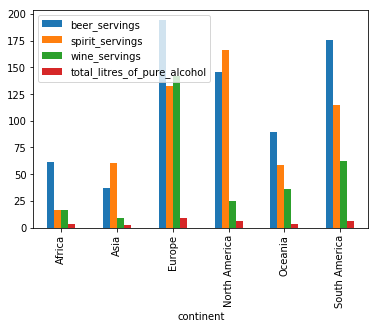

In [28]:
drinks.groupby('continent').mean().plot(kind='bar')

In [31]:
# Explore a series
movies = pd.read_csv('http://bit.ly/imdbratings')

In [32]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [33]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [35]:
#To get the appearence percentages of every genre
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [48]:
#The above is a series so you can use series methods too
movies.genre.value_counts().head(2)

Drama     278
Comedy    156
Name: genre, dtype: int64

In [44]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [49]:
#To see the number of unique values in the dataframe
movies.genre.nunique()

16

In [52]:
#How to create a crosstab with the dataframe fields
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


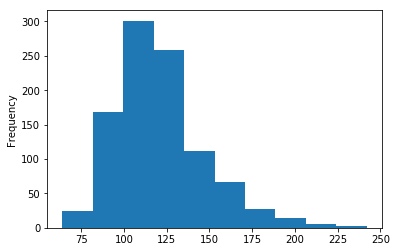

In [53]:
movies.duration.plot(kind = 'hist')

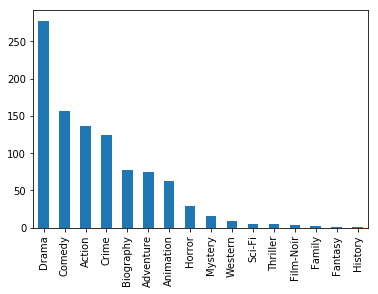

In [54]:
movies.genre.value_counts().plot(kind = 'bar')

In [55]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [56]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [57]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [58]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [59]:
#To get the number of missing values in the dataframe
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [64]:
#To get the exact rows with the missing values in a series
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [65]:
ufo.dropna(how = 'all').shape

(18241, 5)

In [67]:
ufo.dropna(subset = ['State','Time'], how = 'all').shape

(18241, 5)

In [68]:
#To the below command missing values are excluded by default!!!
ufo['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
PYRAMID         1
HEXAGON         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

In [71]:
#This is how you include the NaN values to be counted
ufo['Shape Reported'].value_counts(dropna = False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
DOME            1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [72]:
#Change the NaN values to a value
ufo['Shape Reported'].fillna(value = 'COULD NOT TELL', inplace = True)

In [73]:
ufo['Shape Reported'].value_counts()

LIGHT             2803
COULD NOT TELL    2644
DISK              2122
TRIANGLE          1889
OTHER             1402
CIRCLE            1365
SPHERE            1054
FIREBALL          1039
OVAL               845
CIGAR              617
FORMATION          434
VARIOUS            333
RECTANGLE          303
CYLINDER           294
CHEVRON            248
DIAMOND            234
EGG                197
FLASH              188
TEARDROP           119
CONE                60
CROSS               36
DELTA                7
CRESCENT             2
ROUND                2
PYRAMID              1
HEXAGON              1
DOME                 1
FLARE                1
Name: Shape Reported, dtype: int64

In [74]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [75]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [77]:
#If you set the index as country for example and not as a default number for each row, you can select a value by this index.
drinks.set_index('country', inplace = True)
drinks.loc['Brazil','beer_servings']

245

In [80]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [81]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [82]:
#To erase the name country from the position above
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [83]:
#To reset the indices as before and fetch the name country again as datacolumn
drinks.index.name = 'country'
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [84]:
drinks.reset_index(inplace = True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [85]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [86]:
drinks.describe().loc['25%','spirit_servings']

4.0

In [118]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.set_index('country', inplace = True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [119]:
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [126]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [127]:
drinks.continent.value_counts()['Africa']

53

In [128]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [129]:
#Here you take in alphabetical order
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [140]:
people = pd.Series(['3000000', '40000', '35678'], index = ['Albania', 'Andorra', 'Angola'], dtype = int, name = 'Population')
people
drinks.beer_servings * people

Afghanistan                     NaN
Albania                 267000000.0
Algeria                         NaN
Andorra                   9800000.0
Angola                    7742126.0
Antigua & Barbuda               NaN
Argentina                       NaN
Armenia                         NaN
Australia                       NaN
Austria                         NaN
Azerbaijan                      NaN
Bahamas                         NaN
Bahrain                         NaN
Bangladesh                      NaN
Barbados                        NaN
Belarus                         NaN
Belgium                         NaN
Belize                          NaN
Benin                           NaN
Bhutan                          NaN
Bolivia                         NaN
Bosnia-Herzegovina              NaN
Botswana                        NaN
Brazil                          NaN
Brunei                          NaN
Bulgaria                        NaN
Burkina Faso                    NaN
Burundi                     

In [143]:
#To concatenate rows or columns of a dataframe to a series use axis to tell where you want the series to be concat
pd.concat([drinks, people], sort = False, axis = 1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,40000.0
Angola,217,57,45,5.9,Africa,35678.0


In [145]:
ufo.loc[:, 'City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [147]:
ufo.loc[:4,['City','State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [148]:
ufo.loc[:4,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [149]:
ufo.loc[ufo.City == 'Ithaca', :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
4068,Ithaca,NaN,CIGAR,NY,6/1/1979 19:00
5631,Ithaca,NaN,OTHER,MI,6/1/1987 17:00
6961,Ithaca,NaN,OTHER,NY,1/10/1993 0:30
7573,Ithaca,RED GREEN,LIGHT,NY,10/15/1994 18:00
9088,Ithaca,NaN,COULD NOT TELL,NY,2/16/1996 21:45
16537,Ithaca,NaN,FLASH,MI,6/3/2000 22:35
17049,Ithaca,NaN,TEARDROP,NY,7/30/2000 20:20


In [150]:
ufo.iloc[:4, :4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS


In [151]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [153]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 14.0+ KB


In [154]:
drinks.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 35.4 KB


In [155]:
drinks.memory_usage(deep = True)

Index                           17708
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [156]:
drinks.memory_usage(deep = True).sum()

36216

In [157]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [159]:
#To store continents as int in order to save space in memory and speed up computations like groupby
# You CANNOT do that with Country, because every row has a unique country, so you will end up with more memory_usage!!!!
drinks['continent'] = drinks.continent.astype('category')

In [160]:
drinks.memory_usage(deep = True)

Index                           17708
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [163]:
drinks.continent.cat.codes.head()

Afghanistan    1
Albania        2
Algeria        0
Andorra        2
Angola         0
dtype: int8

In [165]:
prod = pd.DataFrame({'ID':[100,200,300,400], 'quality':['good', 'very good', 'good', 'excellent']})
prod

,ID,quality
0,100,good
1,200,very good
2,300,good
3,400,excellent


In [167]:
prod.sort_values('quality')

,ID,quality
3,400,excellent
0,100,good
2,300,good
1,200,very good


In [171]:
#If you transform the quality to category, you can filter by category like:
prod['quality'] = prod.quality.astype('category', categories = ['good', 'very good', 'excellent'], ordered = True)

In [172]:
prod.sort_values('quality')

,ID,quality
0,100,good
2,300,good
1,200,very good
3,400,excellent


In [175]:
prod.loc[prod.quality > 'good', : ]

,ID,quality
1,200,very good
3,400,excellent


In [174]:
prod.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

# The Titanic Kaggle dataframe

In [216]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
feature_col = ['Pclass','Parch']
X = train.loc[:, feature_col]
X.shape

(891, 2)

In [181]:
y = train.Survived
y.shape

(891,)

In [184]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
test = pd.read_csv('http://bit.ly/kaggletest')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
X_new = test.loc[:, feature_col]
X_new.shape

(418, 2)

In [187]:
new_pred_class = logreg.predict(X_new)
new_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [192]:
#To quarantee the Passenger Id will always be the first column I must declare it as index. Apparently in dicts is not guaranted
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': new_pred_class}).set_index('PassengerId').to_csv('kaggle.csv')

In [196]:
#To save a pandas object like a DataFrame to disk you must pickled it(that`s the name)
train.to_pickle('pickled.pkl')

In [197]:
pd.read_pickle('pickled.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# More Pandas tips

In [198]:
#To get random sample from a file. Everytime you run it you take different rows
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
16297,Piqua,NaN,COULD NOT TELL,OH,4/22/2000 15:00
12428,Denver,NaN,LIGHT,CO,10/25/1998 16:20


In [202]:
#To stabilize the random sample you get every time:
ufo.sample(n=3, random_state = 42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [203]:
#To get a percentage fraction of a stabilized random sample:
ufo.sample(frac = 0.75, random_state = 99)

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,COULD NOT TELL,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00
2094,Victorville,NaN,LIGHT,CA,6/6/1971 21:00
15905,Black Canyon City,BLUE,CIRCLE,AZ,2/16/2000 4:45
6792,Houston,NaN,CHEVRON,TX,6/10/1992 23:00
5063,Ely,NaN,DIAMOND,MN,6/15/1984 19:00
16626,Atlantic Ocean,NaN,COULD NOT TELL,NC,6/17/2000 0:35


In [204]:
#How to create dummy variables with pandas
train['Sex_male'] = train.Sex.map({'female':0, 'male': 1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [205]:
#You can do it with top level function
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [207]:
#When you create dummies you want k - 1 columns. E.g. you want only the female or the male column here
pd.get_dummies(train.Sex, prefix = 'Sex').iloc[:,1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [208]:
#here is an example with more than two columns
pd.get_dummies(train.Embarked, prefix = 'Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [214]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:,1:]
train = pd.concat([train, embarked_dummies],axis = 1)

In [215]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [218]:
#To create dummies for multiple columns and drop the first columns of the dummies columns:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first = True)

In [219]:
train.to_csv('dummies.csv')

In [3]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
#Let`s say we want to see only the hour. Find the dtype and since it`s a string, slice will do it
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [10]:
ufo.Time.str.slice(-5, -3).astype(int).head() #Slice 5 to three characters from the end


0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [11]:
#convert the time column to datetime wiht pandas
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [13]:
#Now I can take only the hour easily or any other attribute of datatime
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [27]:
ufo.Time.dt.weekday_name.head() #weekday_name will be replaced by day_name() in the future

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [16]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [25]:
#convert a given string to datetime. Weekday_name will be replace by day_name() in the future
birthday = pd.to_datetime('19/11/1983')
birthday.day_name()

'Saturday'

In [35]:
#Now I can use these two timestamps as comparison. The colon at the end tell pandas to bring back all the rows
ufo.loc[ufo.Time.dt.year == birthday.year, : ].head()

,City,Colors Reported,Shape Reported,State,Time
4846,Crosby,NaN,CYLINDER,TX,1983-01-10 20:00:00
4847,Seattle,ORANGE,SPHERE,WA,1983-01-13 17:00:00
4848,Glidden,NaN,LIGHT,IA,1983-01-20 18:30:00
4849,Las Vegas,NaN,CIRCLE,NV,1983-02-11 00:00:00
4850,West Palm Beach,NaN,DISK,FL,1983-02-15 01:00:00


In [37]:
#you can perform calculations. The one below is called deltatime object
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [38]:
#And you can see only the day for example
(ufo.Time.max() - ufo.Time.min()).days

25781

In [39]:
#magic function in iPython
%matplotlib inline

In [40]:
#How to show a basic plot of the sightings through years
ufo['Year'] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


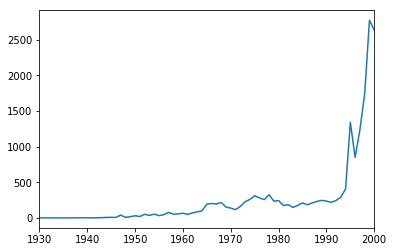

In [41]:
ufo.Year.value_counts().sort_index().plot()

In [44]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col = 'user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [45]:
users.shape

(943, 4)

In [46]:
#to see the duplicates in the dataframe. Returns true if one of the previous rows is identical
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919     True
920    False
921    False
922     True
923    False
924    False
925    False
926    False
927    False
928     True
929     True
930    False
931    False
932    False
933    False
934     True
935    False
936    False
937     True
938    False
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [47]:
#I can sum the True duplicates to see how much are they
users.zip_code.duplicated().sum()

148

In [50]:
#To see how many rows is duplicates to the previous rows in the whole dataframe
users.duplicated().sum()

7

In [51]:
#To see these 7 rows
users.loc[users.duplicated(), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [53]:
users.loc[users.duplicated(keep = 'first'), :] #keep the first duplicated rows that you find and give me the ones below them

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [55]:
users.loc[users.duplicated(keep = 'last'), :] #keep the last rows you will find and give me the ones above them

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [57]:
# all of the duplicated rows. That means both 7 previous and the ones below them
users.loc[users.duplicated(keep = False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [59]:
# now we can drop duplicates and we can do it inplace if we like
users.drop_duplicates(keep = 'first').shape

(936, 4)

In [61]:
#when we want to identify as duplicates those that are in a particular column of columns
users.duplicated(subset = ['age', 'zip_code']).sum()

16

In [62]:
users.drop_duplicates(subset = ['age', 'zip_code']).shape

(927, 4)

In [64]:
#counting missing values
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [65]:
movies.content_rating.isnull().sum()

3

In [66]:
#if we want to see them
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [67]:
#count the values in content_rating column
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [70]:
#We want to replase the 'NOT RATED' rows with nulls...use loc to not take a 'SettingWithCopyWarning'
import numpy as np
movies.loc[movies.content_rating == 'NOT RATED', 'content_rating'] = np.nan
movies.content_rating.isnull().sum()

68

In [72]:
#although in the below situation we still take this warning. That is because pandas is not sure if this is a copy of the df
#or the actual df. In this case we must create a copy explicitly
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [74]:
#lets say we want to change the duration of the first row because we know is wrong
top_movies.loc[0, 'duration'] = 150

C:\Users\Athanasia\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [76]:
#Although we have used loc we take the warning. Use the copy() to bypass
top_movies = movies.loc[movies.star_rating >= 9, :].copy()
top_movies.loc[0, 'duration'] = 150

In [77]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [78]:
#this won`t affect the df for sure
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [80]:
#how we change display options in pandas
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [81]:
#how many rows are being displayed as default?
pd.get_option('display.max_rows')

60

In [82]:
#This means it displays the 30 first and the 30 last rows. What if I want to see all of them?
pd.set_option('display.max_rows', None)

In [83]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [84]:
#to return to the previous default option
pd.reset_option('display.max_rows')

In [85]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [86]:
#to read the documentation on pandas options without having to search the web
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_year

In [87]:
pd.describe_option('rows')

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]




In [88]:
#to reset everything to the default display option. The warning is about some default display that have been deprecated
#thus can be ignored
pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\Athanasia\Anaconda3\lib\site-packages\pandas\core\config.py:615: FutureWarning: html.border has been deprecated, use display.html.border instead
(currently both are identical)

  warnings.warn(d.msg, FutureWarning)
C:\Users\Athanasia\Anaconda3\lib\site-packages\pandas\core\config.py:615: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [93]:
#How to create a dataframe from scratch
df = pd.DataFrame({'id':[100, 101, 102,], 'colour': ['red', 'green', 'red',],}, index = ['a', 'b', 'c',])
df

,id,colour
a,100,red
b,101,green
c,102,red


In [96]:
#you can create a df from a list of lists
df1 = pd.DataFrame([[100, 'red'],[101, 'green'],[102, 'red']], columns = ['id', 'colour'])
df1

,id,colour
0,100,red
1,101,green
2,102,red


In [98]:
#How to convert a numpy array to a dataframe
#create a numpy array with 4 rows, two columns with random values between 0 and 1
import numpy as np
arr = np.random.rand(4, 2)
arr

array([[0.17718681, 0.67590843],
       [0.00702612, 0.40713565],
       [0.19980031, 0.38919148],
       [0.72754444, 0.04136159]])

In [100]:
df2 = pd.DataFrame(arr, columns = ['one', 'two'])
df2

,one,two
0,0.177187,0.675908
1,0.007026,0.407136
2,0.199800,0.389191
3,0.727544,0.041362


In [102]:
#create a df from scratch and use np.arrays for values
#np.arange(100,110,1) I want an array from 100 to 110 and I want every value (that will be 10 at the end)
#np.random.randint(60,101,10) i want an array with values from 60 with 60 to 101 without 101 and I want 10 of them
df3 = pd.DataFrame({'students': np.arange(100,110,1), 'test': np.random.randint(60,101,10)})
df3

,students,test
0,100,84
1,101,70
2,102,97
3,103,68
4,104,80
5,105,88
6,106,93
7,107,100
8,108,67
9,109,74


In [106]:
#i can declare an index too
df3 = pd.DataFrame({'students': np.arange(100,110,1), 'test': np.random.randint(60,101,10)}).set_index('students')
df3

,test
students,
100,61
101,68
102,69
103,77
104,67
105,96
106,80
107,94
108,73


In [107]:
#How to create a new Series put it into the df
s = pd.Series(['dog', 'cat'], index = ['b', 'c'], name = 'animals')
s

b    dog
c    cat
Name: animals, dtype: object

In [117]:
pd.concat([df, s], axis = 1, sort = False)

,id,colour,animals
a,100,red,NaN
b,101,green,dog
c,102,red,cat


In [2]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#How to use the map method. You can do more with it but this is the more used one case
train['Sex_num'] = train.Sex.map({'female':1, 'male':0})
train.loc[:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [7]:
#what apply do as a series method and as a df method
#let`s say we want to find the length of each row in the Name column
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [8]:
#another example how to use apply. I want to round up the Fare column...I will do it with the np.ceil function
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [9]:
#another example. I want to extract the first name of each name in the Name column. I will do it with a function
train.Name.str.split(',')
def get_element(my_list, position):
    return my_list[position]
train.Name.str.split(',').apply(get_element, position = 0)

0               Braund
1              Cumings
2            Heikkinen
3             Futrelle
4                Allen
5                Moran
6             McCarthy
7              Palsson
8              Johnson
9               Nasser
10           Sandstrom
11             Bonnell
12         Saundercock
13           Andersson
14             Vestrom
15             Hewlett
16                Rice
17            Williams
18       Vander Planke
19          Masselmani
20              Fynney
21             Beesley
22             McGowan
23              Sloper
24             Palsson
25             Asplund
26                Emir
27             Fortune
28             O'Dwyer
29            Todoroff
            ...       
861              Giles
862              Swift
863               Sage
864               Gill
865            Bystrom
866       Duran y More
867           Roebling
868      van Melkebeke
869            Johnson
870             Balkic
871           Beckwith
872           Carlsson
873    Vand

In [10]:
#You can do the same with a lambda function
train.Name.str.split(',').apply(lambda x: x[0])

0               Braund
1              Cumings
2            Heikkinen
3             Futrelle
4                Allen
5                Moran
6             McCarthy
7              Palsson
8              Johnson
9               Nasser
10           Sandstrom
11             Bonnell
12         Saundercock
13           Andersson
14             Vestrom
15             Hewlett
16                Rice
17            Williams
18       Vander Planke
19          Masselmani
20              Fynney
21             Beesley
22             McGowan
23              Sloper
24             Palsson
25             Asplund
26                Emir
27             Fortune
28             O'Dwyer
29            Todoroff
            ...       
861              Giles
862              Swift
863               Sage
864               Gill
865            Bystrom
866       Duran y More
867           Roebling
868      van Melkebeke
869            Johnson
870             Balkic
871           Beckwith
872           Carlsson
873    Vand

In [11]:
#the apply method as df method
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [13]:
#I want to find the max number for all the rows of some columns
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis = 0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [14]:
#I want the max value for each row for each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis = 1)

0        0
1      132
2       25
3      312
4      217
5      128
6      221
7      179
8      261
9      279
10      46
11     176
12      63
13       0
14     173
15     373
16     295
17     263
18      34
19      23
20     167
21     173
22     173
23     245
24      31
25     252
26      25
27      88
28      37
29     144
      ... 
163    178
164     90
165    186
166    280
167     35
168     15
169    258
170    106
171      4
172     36
173     36
174    197
175     51
176     51
177     71
178     41
179     45
180    237
181    135
182    219
183     36
184    249
185    220
186    101
187     21
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [20]:
#I want to know wich column is the largest in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis = 1)

0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
5      spirit_servings
6        wine_servings
7      spirit_servings
8        beer_servings
9        beer_servings
10     spirit_servings
11     spirit_servings
12     spirit_servings
13       beer_servings
14     spirit_servings
15     spirit_servings
16       beer_servings
17       beer_servings
18       beer_servings
19       beer_servings
20       beer_servings
21     spirit_servings
22       beer_servings
23       beer_servings
24       beer_servings
25     spirit_servings
26       beer_servings
27       beer_servings
28       beer_servings
29       beer_servings
            ...       
163    spirit_servings
164      beer_servings
165      wine_servings
166      wine_servings
167    spirit_servings
168    spirit_servings
169    spirit_servings
170      beer_servings
171      wine_servings
172      beer_servings
173      beer_servings
174      beer_servings
175      be

In [21]:
#applymap as a df method. This can be used to change the original df too.

drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
5,102.0,128.0,45.0
6,193.0,25.0,221.0
7,21.0,179.0,11.0
8,261.0,72.0,212.0
9,279.0,75.0,191.0


In [3]:
stocks = pd.read_csv('http://bit.ly/smallstocks')
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [23]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [25]:
stocks.groupby('Symbol').Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [29]:
#This is a series with a multiindex
ser = stocks.groupby(['Symbol', 'Date']).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [30]:
ser.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Symbol', 'Date'])

In [31]:
#you can unstack a multiindex series and will become a df
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [32]:
#You can construct the exact df with the pivot_table function
df = stocks.pivot_table(values = 'Close', index = 'Symbol', columns = 'Date')
df

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [33]:
#lets say i want from the ser all the AAPL data. You can do that with loc for a multiindex series
ser.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [35]:
ser.loc['AAPL', '2016-10-03']

112.52

In [36]:
ser.loc[:, '2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [37]:
#and if you have unstacked the series to a df. All of the above can be written for the df.For example:
df.loc['AAPL', '2016-10-03']

112.52

In [5]:
#to set a multiindex
stocks.set_index(['Symbol', 'Date'], inplace = True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [40]:
stocks.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])

In [6]:
#better sort the above
stocks.sort_index(inplace = True)
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [8]:
#Now if I want to see the values of the first row
stocks.loc[('AAPL', '2016-10-03'), :]

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [9]:
#or only the Close column`s value
stocks.loc[('AAPL', '2016-10-03'), 'Close']

112.52

In [10]:
#To take the values for two Symbols
stocks.loc[(['AAPL', 'MSFT'], '2016-10-03'), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
MSFT    2016-10-03     57.42
Name: Close, dtype: float64

In [11]:
#or to see the values for multiple dates. It a two list in a tuple thing and everything in a list.....hehe
stocks.loc[(['AAPL', 'MSFT'], ['2016-10-03','2016-10-04']), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [12]:
#But if I want the values for two dates for all the Symbols, I have to go with slice(None)
stocks.loc[(slice(None), ['2016-10-03','2016-10-04']), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
CSCO    2016-10-03     31.50
        2016-10-04     31.35
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [13]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [14]:
#to see how many unique cities are there in the df
ufo.City.nunique()

6476

In [15]:
ufo.shape

(18241, 5)

In [16]:
ufo.Time.nunique()

16145

In [ ]:
#You can merge two df in one on a common id: pd.merge(df1, df2). There is no example dfs to reflect here
#If you have two dfs with different names of id columns to merge on, you can use: pd.merge(df1, df2, left_on = ' ', right_on = ' ')
#If in one df you try to join on the index, you use: pd.merge(df1, df2, left_index = True, right_on = ' '), in this situation the index
#of the right column will take the place of the index of the merged df
#If you want to join on the index of both dfs: pd.merge(df1, df2, left_index = True, right_index = True), in this case the index
#of the merged df is the left df`s index
#You can decide how you want to merge the dfs: pd.merge(df1,df2, how = 'inner') or 'outer' or 'left' or 'right'

In [17]:
pd.__version__

'0.24.2'

In [18]:
# create an example DataFrame
df = pd.DataFrame([[12, 25, 2017, 10], [1, 15, 2018, 11]],
                  columns=['month', 'day', 'year', 'hour'])
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [19]:
# new: create a datetime column from the entire DataFrame
pd.to_datetime(df)

0   2017-12-25 10:00:00
1   2018-01-15 11:00:00
dtype: datetime64[ns]

In [20]:
#if the df has not only these columns.Create a datetime column from the subset of the df
pd.to_datetime(df[['month', 'day', 'year', 'hour']])

0   2017-12-25 10:00:00
1   2018-01-15 11:00:00
dtype: datetime64[ns]

In [21]:
#with this function you can overwrite the index
df.index = pd.to_datetime(df[['month', 'day', 'year', 'hour']])
df

,month,day,year,hour
2017-12-25 10:00:00,12,25,2017,10
2018-01-15 11:00:00,1,15,2018,11


In [22]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [23]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object